In [70]:
#Let's start with using pandas
import pandas as pd

In [71]:
# 1!! 

#Import central control data
sfmta_data = pd.read_csv("https://www.dropbox.com/s/k4olqc43dpgb2iu/SFMTA_intoxpassenger_2010-1.2020.csv?dl=1")

#preview the data
sfmta_data.head()

ACTION_TAKEN  CALL_DATE CALL_FROM  \
0  5T61 RESPONDED, SFPD 3B12D , MEDIC 74 TRANSPOR...  1/27/2020      4C22   
1  MEDIC 52  CAD #  3868 NOTIFIED AND RESPONDED /...  1/25/2020  OPERATOR   
2  SFPD CAD# 52640, UNIT# 3113D, MOBILE 148  RESP...  1/25/2020  OPERATOR   
3  1C-17B GAMEZ NOTIFIED TMC 6 REQUESTING SFPD. R...  1/24/2020  OPERATOR   
4  5T-64/PITCHER RESPONDED AND CLEARED. NO DELAY ...  1/22/2020  OPERATOR   

  CALL_TIME            Category  Message search terms           Sub Category  \
0     18:43  Passenger Incident                     0  Intoxicated Passenger   
1     23:16  Passenger Incident                     0  Intoxicated Passenger   
2     17:00  Passenger Incident                     0  Intoxicated Passenger   
3     16:02  Passenger Incident                     0  Intoxicated Passenger   
4     19:27  Passenger Incident                     0  Intoxicated Passenger   

   Sum of Incidents  Sum of Vehicle Delay Time  Measure Param  \
0                 1                       65.0              1   
1                 1                       54.0              1   
2                 1                       81.0              1   
3                 1                      138.0              1   
4                 1                        NaN              1   

                 ...                    VEHICLE VEHICLE_DELAY_TIME_END  \
0                ...                       1457        1/27/2020 19:48   
1                ...                       5706         1/27/2020 0:10   
2                ...                       8819        1/25/2020 18:21   
3                ...                       6618        1/24/2020 18:20   
4                ...                  1539-1487                    NaN   

  VEHICLE_DELAY_TIME_START VEHICLE_NEW VEHICLE_NEW_NUM_1 VEHICLE_NEW_NUM_2  \
0          1/27/2020 18:43         NaN               NaN               NaN   
1          1/26/2020 23:16         NaN               NaN               NaN   
2          1/25/2020 17:00         NaN               NaN               NaN   
3          1/24/2020 16:02         NaN               NaN               NaN   
4                      NaN         NaN               NaN               NaN   

       VEH_DELAY VIA Veh_Delay_Time (copy) Vehicle Delay Minutes per Incident  
0  18:43 - 19:48   R                  65.0                               65.0  
1  23:16 - 00:10   R                  54.0                               54.0  
2  17:00 - 18:21   R                  81.0                               81.0  
3  16:02 - 18:20   R                 138.0                              138.0  
4  00:00 - 00:00   R                   NaN                                NaN  

[5 rows x 50 columns]

In [72]:
sfmta_data.describe()

Message search terms  Sum of Incidents  Sum of Vehicle Delay Time  \
count           2622.000000            2622.0                2412.000000   
mean               0.048818               1.0                  30.615672   
std                0.645399               0.0                  75.007996   
min                0.000000               1.0                   0.000000   
25%                0.000000               1.0                  11.000000   
50%                0.000000               1.0                  20.000000   
75%                0.000000               1.0                  36.000000   
max                9.000000               1.0                1437.000000   

       Measure Param  LOCATION_ORIGINAL  Number of Records          RUN  \
count         2622.0                0.0             2622.0  2399.000000   
mean             1.0                NaN                1.0   336.799500   
std              0.0                NaN                0.0   209.871553   
min              1.0                NaN                1.0     0.000000   
25%              1.0                NaN                1.0   148.000000   
50%              1.0                NaN                1.0   317.000000   
75%              1.0                NaN                1.0   477.000000   
max              1.0                NaN                1.0   978.000000   

             TAG_ID  VEHICLE_NEW_NUM_2  Veh_Delay_Time (copy)  \
count  2.622000e+03           2.000000            2412.000000   
mean   1.467568e+06        1450.000000              30.615672   
std    1.159594e+05          11.313708              75.007996   
min    1.280143e+06        1442.000000               0.000000   
25%    1.366055e+06        1446.000000              11.000000   
50%    1.458756e+06        1450.000000              20.000000   
75%    1.569520e+06        1454.000000              36.000000   
max    1.677508e+06        1458.000000            1437.000000   

       Vehicle Delay Minutes per Incident  
count                         2412.000000  
mean                            30.615672  
std                             75.007996  
min                              0.000000  
25%                             11.000000  
50%                             20.000000  
75%                             36.000000  
max                           1437.000000

In [73]:
# 2!! 

#Bring in the Health Care Facilities with JSON

import pandas as pd

import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()


In [74]:
# download data on facilities

facilities_url = "https://data.sfgov.org/resource/jhsu-2pka.geojson"
facilities_response = requests.get(facilities_url)
facilities_results = facilities_response.text

In [75]:
# what's the data type of the results?

type(facilities_results)

str

In [76]:
# print the first 500 characters to see a sample of the data

print(facilities_results[:500])

{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.4358177,37.76905419]},"properties":{"facility_type":"General Acute Care Hospital","services":"Hospital","oshpd_id":"106380933","uid":"2","facility_name":"California Pacific Med Ctr-davies Campus"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.43329371,37.72674014]},"properties":{"facility_type":"Community Clinic","services":"Senior Health","oshpd_id":"306384163","uid":


In [77]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
facilities_data = json.loads(facilities_results)  # loads = "load string"

type(facilities_data)

dict

In [78]:
# print the dictionary

pp.pprint(facilities_data)

{'crs': {'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'},
         'type': 'name'},
 'features': [{'geometry': {'coordinates': [-122.4358177, 37.76905419],
                            'type': 'Point'},
               'properties': {'facility_name': 'California Pacific Med '
                                               'Ctr-davies Campus',
                              'facility_type': 'General Acute Care Hospital',
                              'oshpd_id': '106380933',
                              'services': 'Hospital',
                              'uid': '2'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-122.43329371, 37.72674014],
                            'type': 'Point'},
               'properties': {'facility_name': 'On Lok Senior Health '
                                               'Services-mission Center',
                              'facility_type': 'Community Clinic',
                              'oshpd_id': '306384163'

                            'type': 'Point'},
               'properties': {'facility_name': 'Richmond Maxi-center',
                              'facility_type': 'Community Clinic',
                              'oshpd_id': '306381330',
                              'services': 'Cultural General Health',
                              'uid': '45'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-122.450374, 37.76999193],
                            'type': 'Point'},
               'properties': {'facility_name': 'Cole Street Clinic',
                              'facility_type': 'Community Health Network',
                              'oshpd_id': '0',
                              'services': ' ',
                              'uid': '73'},
               'type': 'Feature'}],
 'type': 'FeatureCollection'}


In [79]:
"""
Link to map of SF Health Care Facilities
http://geojson.io/#map=13/37.7559/-122.4449
    
Add data using this link:
https://data.sfgov.org/resource/jhsu-2pka.geojson
"""

'\nLink to map of SF Health Care Facilities\nhttp://geojson.io/#map=13/37.7559/-122.4449\n    \nAdd data using this link:\nhttps://data.sfgov.org/resource/jhsu-2pka.geojson\n'

In [80]:
# 3!! 
# download data on Muni transpo network

muninw_url = "https://data.sfgov.org/resource/9exe-acju.geojson"
muninw_response = requests.get(muninw_url)
muninw_results = muninw_response.text

# what's the data type of the results?

type(muninw_results)

str

In [81]:
# print the first 500 characters to see a sample of the data

print(muninw_results[:500])

{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"LineString","coordinates":[[-122.3969547857808,37.795431052464615],[-122.39779578577077,37.79443405260821],[-122.39896978561259,37.79428405270635],[-122.40014778545387,37.79413405280481],[-122.40131378529652,37.793987052902175],[-122.40215878518262,37.79388005297274],[-122.40295678507499,37.793779053039415],[-122.40401578493208,37.79364605312776],[-122.40461278585225,37.79356505317804],[-122.40612878464714,37.79337


In [82]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
muninw_data = json.loads(muninw_results)  # loads = "load string"

type(muninw_data)

dict

In [83]:
"""
Dataset might be too big for GeoJson - might wanna try on something that isn't my laptop

Link to map of Muni Network
http://geojson.io
    
Add data using this link:
https://data.sfgov.org/resource/9exe-acju.geojson

"""

"\nDataset might be too big for GeoJson - might wanna try on something that isn't my laptop\n\nLink to map of Muni Network\nhttp://geojson.io\n    \nAdd data using this link:\nhttps://data.sfgov.org/resource/9exe-acju.geojson\n\n"

In [85]:
# 4!!

# import opioid death data
opdeath18_data = pd.read_csv("https://www.dropbox.com/s/iblpnv70nhsyrok/Death_SanFrancisco_AnyOpioid_2018.csv?dl=1")
    
opdeath18_data.rename(columns = {'San Francisco Deaths - 2018' : 'OpDeaths18 Zip Code',
                            'Unnamed: 1': 'Death Rates', 
                             'Unnamed: 2': 'Death 95% LCL', 
                             'Unnamed: 3' : 'Death 95% UCL'}, inplace=True)
#preview the data
opdeath18_data.head()

OpDeaths18 Zip Code Death Rates  \
0  Any Opioid-Related Overdose : Age-Adjusted Rat...         NaN   
1                                           Zip Code       Rates   
2                                              94102       94.85   
3                                              94103       60.02   
4                                              94104      156.97   

  Death 95% LCL Death 95% UCL  
0           NaN           NaN  
1       95% LCL       95% UCL  
2         65.07        172.54  
3         36.27        120.56  
4          3.97       4430.61

In [90]:
#cut out the top two rows bc they are metadata
opdeath18_data.drop(opdeath18_data.index[[0,1,29,30,31,32]])

OpDeaths18 Zip Code Death Rates Death 95% LCL Death 95% UCL
2                94102       94.85         65.07        172.54
3                94103       60.02         36.27        120.56
4                94104      156.97          3.97       4430.61
5                94105       10.92          0.28        588.25
6                94107        7.02          0.85         51.69
7                94108       21.45          5.45        117.03
8                94109       20.81         10.36         64.83
9                94110        21.2         12.46         39.84
10               94111           0             0             0
11               94112       10.29          4.55         21.62
12               94114        2.35          0.06         54.13
13               94115        8.29          1.94         43.92
14               94116           0             0         15.36
15               94117       14.19           5.5         48.17
16               94118        7.85          1.59         42.55
17               94121           0             0         23.47
18               94122        3.44          0.32         17.66
19               94123        4.57          0.12         68.71
20               94124       23.33         10.21         48.02
21               94127       11.35          1.88            52
22               94129           0             0         372.6
23               94130           0             0             0
24               94131        8.02           1.6         42.73
25               94132        6.12          0.51         39.47
26               94133           0             0             0
27               94134       11.39           3.6         29.27
28               94158           0             0        310.43

In [86]:
opdeath18_data.describe()

OpDeaths18 Zip Code Death Rates Death 95% LCL Death 95% UCL
count                   33          30            30            30
unique                  33          24            24            28
top                  94123           0             0             0
freq                     1           7             7             3

In [87]:
# 5!! CA Opioid data

#Import the opioid ED Visit 2018 data

oped18_data = pd.read_csv("https://www.dropbox.com/s/1a8v10nnam0788j/EdVisit_SanFrancisco_AnyOpioid_2018.csv?dl=1")

oped18_data.rename(columns = {'San Francisco ED Visits - 2018' : 'OpED18 Zip Code',
                            'Unnamed: 1': 'ED Rates', 
                             'Unnamed: 2': 'ED 95% LCL', 
                             'Unnamed: 3' : 'ED 95% UCL'}, inplace=True)

#preview the data
oped18_data.head()

OpED18 Zip Code ED Rates ED 95% LCL  \
0  Any Opioid-Related Overdose : Age-Adjusted Rat...      NaN        NaN   
1                                           Zip Code    Rates    95% LCL   
2                                              94102   285.88     232.83   
3                                              94103   285.97     228.76   
4                                              94104   1525.1     341.92   

  ED 95% UCL  
0        NaN  
1    95% UCL  
2      378.8  
3     372.35  
4    6171.31

In [89]:
#drop rows 0 and 1, which are metadata 
oped18_data.drop(oped18_data.index[[0,1,29,30,31,32]])

OpED18 Zip Code ED Rates ED 95% LCL ED 95% UCL
2            94102   285.88     232.83      378.8
3            94103   285.97     228.76     372.35
4            94104   1525.1     341.92    6171.31
5            94105   243.68      35.71     949.32
6            94107    40.11      21.52      88.61
7            94108    76.01      37.95     180.49
8            94109    113.8      84.83     168.15
9            94110    41.87      29.31      63.37
10           94111    455.9     248.26    1333.69
11           94112    21.99      13.11      36.05
12           94114    23.11       7.56      78.57
13           94115    30.24      11.25      75.61
14           94116    10.88       3.88      29.32
15           94117    41.84      25.14      79.86
16           94118    22.56      10.27      59.23
17           94121    44.82      26.24      78.48
18           94122     16.7       7.81      34.62
19           94123    14.04       2.74      79.03
20           94124    71.07      45.97     106.87
21           94127     8.54       1.67      46.73
22           94129    12.46       0.32     381.78
23           94130    100.2       19.7    1559.24
24           94131    17.62       6.38      54.35
25           94132    11.04       2.53      45.05
26           94133    27.05      11.19      78.39
27           94134    37.04       20.9      62.43
28           94158     5.35       0.14     313.81

In [91]:
oped18_data.describe()

OpED18 Zip Code ED Rates ED 95% LCL ED 95% UCL
count               33       30         30         30
unique              33       30         30         30
top              94123     16.7      10.27      29.32
freq                 1        1          1          1

In [28]:
# 6!!

#Import the opioid Hospitilization 2018 data

hosp_data = pd.read_csv("https://www.dropbox.com/s/0rcfdjy3lg40gqq/Hospit_SanFrancisco_AnyOpioid_2018.csv?dl=1")
hosp_data.rename(columns = {'Unnamed: 1': 'Rates', 
                             'Unnamed: 2': '95% LCL', 
                             'Unnamed: 3' : '95% UCL'}, inplace=True)

#preview the data
hosp_data.head()

San Francisco Hospitalizations - 2018  Rates  95% LCL  95% UCL
0  Any Opioid-Related Overdose  : Age-Adjusted Ra...    NaN      NaN      NaN
1                                           Zip Code  Rates  95% LCL  95% UCL
2                                              94102  21.66     10.6    93.68
3                                              94103   33.7     17.3    90.52
4                                              94104      0        0        0

In [ ]:
oped18_data.drop(oped18_data.index[[0,1,29,30,31,32]])

In [29]:
hosp_data.describe()

San Francisco Hospitalizations - 2018 Rates 95% LCL 95% UCL
count                                     33    30      30      30
unique                                    33    25      24      30
top                                    94123     0       0   90.52
freq                                       1     6       6       1

In [30]:
# 7!!

#Import the opioid prescription 2018 data
prescrip_data = pd.read_csv('https://www.dropbox.com/s/jse6c8p047p0gh8/Prescrip_SanFrancisco_AnyOpioid_2018.csv?dl=1')

prescrip_data.rename(columns = {'Unnamed: 1': 'Rates', 
                             'Unnamed: 2': '95% LCL', 
                             'Unnamed: 3' : '95% UCL'}, inplace=True)

#preview the data
prescrip_data.head()

San Francisco Prescriptions - 2018    Rates  95% LCL  \
0  Opioid Prescriptions by Patient Location : Age...      NaN      NaN   
1                                           Zip Code    Rates  95% LCL   
2                                              94102   412.38    405.7   
3                                              94103   392.68   385.52   
4                                              94104  1390.63   1239.6   

   95% UCL  
0      NaN  
1  95% UCL  
2   419.32  
3   400.06  
4  1563.63

In [31]:
prescrip_data.describe()

San Francisco Prescriptions - 2018  Rates 95% LCL 95% UCL
count                                  33     30      30      30
unique                                 33     30      30      30
top                                 94123  Rates  250.92  485.29
freq                                    1      1       1       1

In [3]:
#Let's start with using pandas
import pandas as pd

In [4]:
# 1!! 

#Import central control data
sfmta_data = pd.read_csv("https://www.dropbox.com/s/k4olqc43dpgb2iu/SFMTA_intoxpassenger_2010-1.2020.csv?dl=1")

#preview the data
sfmta_data.head()

ACTION_TAKEN  CALL_DATE CALL_FROM  \
0  5T61 RESPONDED, SFPD 3B12D , MEDIC 74 TRANSPOR...  1/27/2020      4C22   
1  MEDIC 52  CAD #  3868 NOTIFIED AND RESPONDED /...  1/25/2020  OPERATOR   
2  SFPD CAD# 52640, UNIT# 3113D, MOBILE 148  RESP...  1/25/2020  OPERATOR   
3  1C-17B GAMEZ NOTIFIED TMC 6 REQUESTING SFPD. R...  1/24/2020  OPERATOR   
4  5T-64/PITCHER RESPONDED AND CLEARED. NO DELAY ...  1/22/2020  OPERATOR   

  CALL_TIME            Category  Message search terms           Sub Category  \
0     18:43  Passenger Incident                     0  Intoxicated Passenger   
1     23:16  Passenger Incident                     0  Intoxicated Passenger   
2     17:00  Passenger Incident                     0  Intoxicated Passenger   
3     16:02  Passenger Incident                     0  Intoxicated Passenger   
4     19:27  Passenger Incident                     0  Intoxicated Passenger   

   Sum of Incidents  Sum of Vehicle Delay Time  Measure Param  \
0                 1                       65.0              1   
1                 1                       54.0              1   
2                 1                       81.0              1   
3                 1                      138.0              1   
4                 1                        NaN              1   

                 ...                    VEHICLE VEHICLE_DELAY_TIME_END  \
0                ...                       1457        1/27/2020 19:48   
1                ...                       5706         1/27/2020 0:10   
2                ...                       8819        1/25/2020 18:21   
3                ...                       6618        1/24/2020 18:20   
4                ...                  1539-1487                    NaN   

  VEHICLE_DELAY_TIME_START VEHICLE_NEW VEHICLE_NEW_NUM_1 VEHICLE_NEW_NUM_2  \
0          1/27/2020 18:43         NaN               NaN               NaN   
1          1/26/2020 23:16         NaN               NaN               NaN   
2          1/25/2020 17:00         NaN               NaN               NaN   
3          1/24/2020 16:02         NaN               NaN               NaN   
4                      NaN         NaN               NaN               NaN   

       VEH_DELAY VIA Veh_Delay_Time (copy) Vehicle Delay Minutes per Incident  
0  18:43 - 19:48   R                  65.0                               65.0  
1  23:16 - 00:10   R                  54.0                               54.0  
2  17:00 - 18:21   R                  81.0                               81.0  
3  16:02 - 18:20   R                 138.0                              138.0  
4  00:00 - 00:00   R                   NaN                                NaN  

[5 rows x 50 columns]

In [5]:
sfmta_data.describe()

Message search terms  Sum of Incidents  Sum of Vehicle Delay Time  \
count           2622.000000            2622.0                2412.000000   
mean               0.048818               1.0                  30.615672   
std                0.645399               0.0                  75.007996   
min                0.000000               1.0                   0.000000   
25%                0.000000               1.0                  11.000000   
50%                0.000000               1.0                  20.000000   
75%                0.000000               1.0                  36.000000   
max                9.000000               1.0                1437.000000   

       Measure Param  LOCATION_ORIGINAL  Number of Records          RUN  \
count         2622.0                0.0             2622.0  2399.000000   
mean             1.0                NaN                1.0   336.799500   
std              0.0                NaN                0.0   209.871553   
min              1.0                NaN                1.0     0.000000   
25%              1.0                NaN                1.0   148.000000   
50%              1.0                NaN                1.0   317.000000   
75%              1.0                NaN                1.0   477.000000   
max              1.0                NaN                1.0   978.000000   

             TAG_ID  VEHICLE_NEW_NUM_2  Veh_Delay_Time (copy)  \
count  2.622000e+03           2.000000            2412.000000   
mean   1.467568e+06        1450.000000              30.615672   
std    1.159594e+05          11.313708              75.007996   
min    1.280143e+06        1442.000000               0.000000   
25%    1.366055e+06        1446.000000              11.000000   
50%    1.458756e+06        1450.000000              20.000000   
75%    1.569520e+06        1454.000000              36.000000   
max    1.677508e+06        1458.000000            1437.000000   

       Vehicle Delay Minutes per Incident  
count                         2412.000000  
mean                            30.615672  
std                             75.007996  
min                              0.000000  
25%                             11.000000  
50%                             20.000000  
75%                             36.000000  
max                           1437.000000

In [6]:
sfmta_data.CALL_DATE.describe()

count          2622
unique         1535
top       8/28/2014
freq              6
Name: CALL_DATE, dtype: object

In [7]:
sfmta_data.CALL_TIME.describe()

count      2622
unique     1086
top       18:42
freq         12
Name: CALL_TIME, dtype: object

In [8]:
sfmta_df = sfmta_data

In [9]:
type(sfmta_df)

pandas.core.frame.DataFrame

In [10]:
sfmta_df['incident_date'] = sfmta_df['CALL_DATE']
sfmta_df['incident_time'] = sfmta_df['CALL_TIME']
sfmta_df['line'] = sfmta_df['LINE']
sfmta_df['caller'] = sfmta_df['CALL_FROM']

In [11]:
sfmta_df.head()

ACTION_TAKEN  CALL_DATE CALL_FROM  \
0  5T61 RESPONDED, SFPD 3B12D , MEDIC 74 TRANSPOR...  1/27/2020      4C22   
1  MEDIC 52  CAD #  3868 NOTIFIED AND RESPONDED /...  1/25/2020  OPERATOR   
2  SFPD CAD# 52640, UNIT# 3113D, MOBILE 148  RESP...  1/25/2020  OPERATOR   
3  1C-17B GAMEZ NOTIFIED TMC 6 REQUESTING SFPD. R...  1/24/2020  OPERATOR   
4  5T-64/PITCHER RESPONDED AND CLEARED. NO DELAY ...  1/22/2020  OPERATOR   

  CALL_TIME            Category  Message search terms           Sub Category  \
0     18:43  Passenger Incident                     0  Intoxicated Passenger   
1     23:16  Passenger Incident                     0  Intoxicated Passenger   
2     17:00  Passenger Incident                     0  Intoxicated Passenger   
3     16:02  Passenger Incident                     0  Intoxicated Passenger   
4     19:27  Passenger Incident                     0  Intoxicated Passenger   

   Sum of Incidents  Sum of Vehicle Delay Time  Measure Param    ...     \
0                 1                       65.0              1    ...      
1                 1                       54.0              1    ...      
2                 1                       81.0              1    ...      
3                 1                      138.0              1    ...      
4                 1                        NaN              1    ...      

  VEHICLE_NEW_NUM_1 VEHICLE_NEW_NUM_2      VEH_DELAY VIA  \
0               NaN               NaN  18:43 - 19:48   R   
1               NaN               NaN  23:16 - 00:10   R   
2               NaN               NaN  17:00 - 18:21   R   
3               NaN               NaN  16:02 - 18:20   R   
4               NaN               NaN  00:00 - 00:00   R   

  Veh_Delay_Time (copy) Vehicle Delay Minutes per Incident incident_date  \
0                  65.0                               65.0     1/27/2020   
1                  54.0                               54.0     1/25/2020   
2                  81.0                               81.0     1/25/2020   
3                 138.0                              138.0     1/24/2020   
4                   NaN                                NaN     1/22/2020   

  incident_time line    caller  
0         18:43    M      4C22  
1         23:16    6  OPERATOR  
2         17:00   29  OPERATOR  
3         16:02  14R  OPERATOR  
4         19:27    N  OPERATOR  

[5 rows x 54 columns]

In [12]:
analysis = sfmta_df[['incident_date', 'incident_time', 'line', 'caller']].copy()

In [13]:
analysis.head()

incident_date incident_time line    caller
0     1/27/2020         18:43    M      4C22
1     1/25/2020         23:16    6  OPERATOR
2     1/25/2020         17:00   29  OPERATOR
3     1/24/2020         16:02  14R  OPERATOR
4     1/22/2020         19:27    N  OPERATOR

In [14]:
analysis.describe()

incident_date incident_time  line    caller
count           2622          2622  2409      2622
unique          1535          1086    98       220
top        8/28/2014         18:42    14  OPERATOR
freq               6            12   255      2256

In [31]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 4 columns):
incident_date    2622 non-null object
incident_time    2622 non-null object
line             2409 non-null object
caller           2622 non-null object
dtypes: object(4)
memory usage: 82.0+ KB


In [39]:
#analysis['incident_time'].dt.time
analysis['time'] = pd.to_datetime(analysis['incident_time'], format='%H:%M').dt.time

In [48]:
analysis['hour'] = pd.to_datetime(analysis['incident_time'], format='%H:%M').dt.hour

In [49]:
analysis.head()

incident_date incident_time line    caller      time  hour
0     1/27/2020         18:43    M      4C22  18:43:00    18
1     1/25/2020         23:16    6  OPERATOR  23:16:00    23
2     1/25/2020         17:00   29  OPERATOR  17:00:00    17
3     1/24/2020         16:02  14R  OPERATOR  16:02:00    16
4     1/22/2020         19:27    N  OPERATOR  19:27:00    19

In [53]:
#analysis.groupby('line').incident_time.describe()
analysis.groupby('line').hour.describe()

count       mean        std   min    25%   50%    75%   max
line                                                             
 F      1.0  19.000000        NaN  19.0  19.00  19.0  19.00  19.0
1      14.0  15.357143   6.295385   0.0  10.75  17.0  19.75  23.0
10      7.0  16.714286   6.183696   7.0  12.50  19.0  21.50  23.0
103     3.0   3.333333   2.886751   0.0   2.50   5.0   5.00   5.0
105     2.0   3.500000   0.707107   3.0   3.25   3.5   3.75   4.0
108     1.0  12.000000        NaN  12.0  12.00  12.0  12.00  12.0
12      9.0  17.888889   4.400126  10.0  16.00  19.0  20.00  23.0
14    255.0  13.109804   8.017433   0.0   5.00  16.0  20.00  23.0
14L    18.0  14.111111   3.233808   7.0  13.00  14.5  16.00  19.0
14R    38.0  14.763158   2.784457  10.0  13.00  15.0  16.00  19.0
14X     2.0  13.000000   4.242641  10.0  11.50  13.0  14.50  16.0
16X     1.0  17.000000        NaN  17.0  17.00  17.0  17.00  17.0
17      1.0  18.000000        NaN  18.0  18.00  18.0  18.00  18.0
18     12.0  12.833333   7.030238   0.0   8.00  11.5  19.25  22.0
1813    1.0  18.000000        NaN  18.0  18.00  18.0  18.00  18.0
19     53.0  14.490566   6.053043   0.0  12.00  15.0  19.00  23.0
2       6.0  14.833333   3.488075  11.0  12.25  14.0  18.00  19.0
21     28.0  16.392857   5.159237   0.0  14.00  18.0  20.00  23.0
22     93.0  12.731183   7.490777   0.0   6.00  15.0  19.00  23.0
23      3.0  14.333333   8.020806   6.0  10.50  15.0  18.50  22.0
24     45.0  14.911111   7.022115   0.0  10.00  18.0  21.00  23.0
25      5.0  14.800000   8.438009   0.0  16.00  18.0  20.00  20.0
27     41.0  14.634146   4.856728   0.0  12.00  15.0  19.00  22.0
28     37.0  15.135135   6.587708   0.0  11.00  18.0  19.00  23.0
28R     3.0  10.666667   4.618802   8.0   8.00   8.0  12.00  16.0
29     34.0  15.000000   6.906299   0.0  11.00  17.0  19.00  23.0
29`     1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0
3       6.0  14.500000   3.619392   8.0  14.25  15.0  15.75  19.0
30     46.0  15.717391   5.492067   0.0  14.00  16.0  20.00  23.0
31     55.0  14.345455   7.069020   0.0  10.50  15.0  20.00  23.0
...     ...        ...        ...   ...    ...   ...    ...   ...
8      84.0  13.619048   8.323149   0.0   7.50  16.5  20.00  23.0
8X     50.0  14.120000   6.598206   0.0  11.00  16.0  19.00  23.0
9      94.0  14.276596   6.151150   0.0  13.00  15.5  18.00  23.0
90      8.0   2.125000   1.246423   0.0   1.75   2.0   3.00   4.0
91     47.0   3.595745   4.301969   1.0   2.00   3.0   4.00  23.0
94      4.0   2.000000   1.414214   1.0   1.00   1.5   2.50   4.0
9L      8.0  14.250000   2.052873  12.0  13.00  13.0  16.25  17.0
9R     24.0  15.083333   4.009951   6.0  13.25  16.0  18.00  21.0
9`      1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0
ALL     1.0   0.000000        NaN   0.0   0.00   0.0   0.00   0.0
E       4.0  15.500000   3.000000  13.0  13.00  15.0  17.50  19.0
F     101.0  15.554455   6.301548   0.0  11.00  17.0  20.00  23.0
J      31.0  14.258065   6.999846   0.0   9.50  15.0  19.50  23.0
J/N     1.0   8.000000        NaN   8.0   8.00   8.0   8.00   8.0
K      11.0  11.181818   8.316468   1.0   4.00   7.0  18.00  23.0
K,T     4.0  13.500000   9.814955   5.0   5.00  13.5  22.00  22.0
K.L.    1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0
K/T     9.0  10.333333   7.365460   1.0   5.00  11.0  17.00  22.0
KOWL    3.0  10.000000  11.357817   2.0   3.50   5.0  14.00  23.0
KT     83.0  14.710843   6.645244   0.0  10.00  17.0  20.00  23.0
L      52.0  10.807692   7.713087   0.0   3.00  13.0  18.00  23.0
M      35.0  14.314286   7.940112   0.0   8.00  17.0  21.00  23.0
M,L,    1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0
N     138.0  14.594203   7.284257   0.0  10.25  17.0  21.00  23.0
N/J     1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0
NOWL    1.0   3.000000        NaN   3.0   3.00   3.0   3.00   3.0
NX      1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0
S       2.0  17.000000   5.656854  13.0  15.00

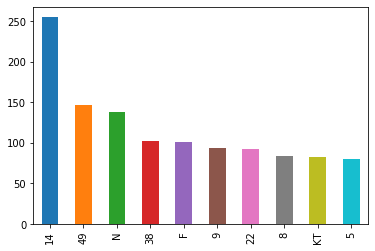

In [78]:
#analysis.nlargest(n=10, columns='line')
#analysis.sort_values(by=['line'])
#analysis.nlargest(n=10, columns='line'.count())
analysis['line'].value_counts()[:10].plot(kind='bar')

0          1          2          3          4     \
incident_date  1/27/2020  1/25/2020  1/25/2020  1/24/2020  1/22/2020   
incident_time      18:43      23:16      17:00      16:02      19:27   
line                   M          6         29        14R          N   
caller              4C22   OPERATOR   OPERATOR   OPERATOR   OPERATOR   
time            18:43:00   23:16:00   17:00:00   16:02:00   19:27:00   

                    5          6          7          8          9     \
incident_date  1/20/2020  1/17/2020  1/17/2020  1/16/2020  1/16/2020   
incident_time       3:45       5:59       5:59      17:56      12:04   
line                  14         KT         KT          8        14R   
caller          OPERATOR   OPERATOR   OPERATOR   OPERATOR   OPERATOR   
time            03:45:00   05:59:00   05:59:00   17:56:00   12:04:00   

                 ...          2612       2613       2614       2615  \
incident_date    ...     4/24/2013  4/22/2013  4/20/2013  4/19/2013   
incident_time    ...         21:50      13:43       0:35       6:32   
line             ...            14         49         44         8X   
caller           ...      OPERATOR   OPERATOR   OPERATOR   OPERATOR   
time             ...      21:50:00   13:43:00   00:35:00   06:32:00   

                    2616       2617       2618       2619       2620      2621  
incident_date  4/19/2013  4/19/2013  4/19/2013  4/19/2013  4/18/2013  4/1/2013  
incident_time       0:08       2:22      23:00      22:30       8:48      0:32  
line                  22         90         49         22        14L        38  
caller          OPERATOR   OPERATOR   OPERATOR   OPERATOR       SFPD  OPERATOR  
time            00:08:00   02:22:00   23:00:00   22:30:00   08:48:00  00:32:00  

[5 rows x 2622 columns]

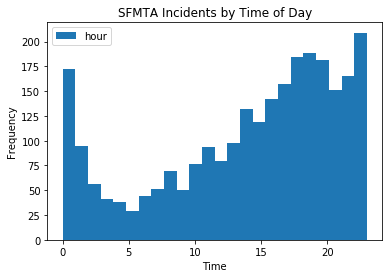

In [157]:
cc_time = pd.Series(analysis['hour'])
cc_time.plot.hist(bins=24)

# add the x-axis label
plt.xlabel("Time")

# add the y-axis label
plt.ylabel("Frequency")

# add the legend
plt.legend()

# add the title
plt.title("SFMTA Incidents by Time of Day")

# show the plot
plt.show()

In [125]:
# Import the library
import matplotlib.pyplot as plt

# This line allows the plots display to nicely in the notebook.
%matplotlib inline

### SAM HELP ME!!!

No handles with labels found to put in legend.


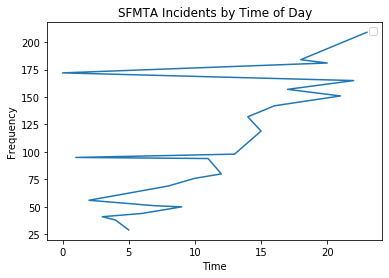

In [158]:
#cc_time = pd.Series(analysis['hour'])
#cc_time.plot.line(x=analysis['hour'])
# create a line plot for the first class
# label this line as class one for the legend
plt.plot(number_incidents)

# add the x-axis label
plt.xlabel("Time")

# add the y-axis label
plt.ylabel("Frequency")

# add the legend
plt.legend()

# add the title
plt.title("SFMTA Incidents by Time of Day")

# show the plot
plt.show()

In [6]:
# 2!! 

#Bring in the Health Care Facilities with JSON

import pandas as pd

import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()


In [80]:
# download data on facilities

facilities_url = "https://data.sfgov.org/resource/jhsu-2pka.geojson"
facilities_response = requests.get(facilities_url)
facilities_results = facilities_response.text

In [81]:
# what's the data type of the results?

type(facilities_results)

str

In [82]:
# print the first 500 characters to see a sample of the data

print(facilities_results[:500])

{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.4358177,37.76905419]},"properties":{"facility_type":"General Acute Care Hospital","services":"Hospital","oshpd_id":"106380933","uid":"2","facility_name":"California Pacific Med Ctr-davies Campus"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.43329371,37.72674014]},"properties":{"facility_type":"Community Clinic","services":"Senior Health","oshpd_id":"306384163","uid":


In [94]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
facilities_data = json.loads(facilities_results)  # loads = "load string"

type(facilities_data)

dict

In [96]:
# print the dictionary

pp.pprint(facilities_data)

{'crs': {'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'},
         'type': 'name'},
 'features': [{'geometry': {'coordinates': [-122.4358177, 37.76905419],
                            'type': 'Point'},
               'properties': {'facility_name': 'California Pacific Med '
                                               'Ctr-davies Campus',
                              'facility_type': 'General Acute Care Hospital',
                              'oshpd_id': '106380933',
                              'services': 'Hospital',
                              'uid': '2'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-122.43329371, 37.72674014],
                            'type': 'Point'},
               'properties': {'facility_name': 'On Lok Senior Health '
                                               'Services-mission Center',
                              'facility_type': 'Community Clinic',
                              'oshpd_id': '306384163'

In [85]:
"""
Link to map of SF Health Care Facilities
http://geojson.io/#map=13/37.7559/-122.4449
    
Add data using this link:
https://data.sfgov.org/resource/jhsu-2pka.geojson
"""

'\nLink to map of SF Health Care Facilities\nhttp://geojson.io/#map=13/37.7559/-122.4449\n    \nAdd data using this link:\nhttps://data.sfgov.org/resource/jhsu-2pka.geojson\n'

In [15]:
# 3!! 
# download data on Muni transpo network

muninw_url = "https://data.sfgov.org/resource/9exe-acju.geojson"
muninw_response = requests.get(muninw_url)
muninw_results = muninw_response.text

# what's the data type of the results?

type(muninw_results)

str

In [87]:
# print the first 500 characters to see a sample of the data

print(muninw_results[:500])

{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"LineString","coordinates":[[-122.3969547857808,37.795431052464615],[-122.39779578577077,37.79443405260821],[-122.39896978561259,37.79428405270635],[-122.40014778545387,37.79413405280481],[-122.40131378529652,37.793987052902175],[-122.40215878518262,37.79388005297274],[-122.40295678507499,37.793779053039415],[-122.40401578493208,37.79364605312776],[-122.40461278585225,37.79356505317804],[-122.40612878464714,37.79337


In [88]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
muninw_data = json.loads(muninw_results)  # loads = "load string"

type(muninw_data)

dict

In [ ]:
"""
Dataset might be too big for GeoJson - might wanna try on something that isn't my laptop

Link to map of Muni Network
http://geojson.io
    
Add data using this link:
https://data.sfgov.org/resource/9exe-acju.geojson

In [6]:
# 4!!

# import opioid death data
death_data = pd.read_csv("https://www.dropbox.com/s/iblpnv70nhsyrok/Death_SanFrancisco_AnyOpioid_2018.csv?dl=1")

#preview the data
death_data.head()

San Francisco Deaths - 2018 Unnamed: 1 Unnamed: 2  \
0  Any Opioid-Related Overdose : Age-Adjusted Rat...        NaN        NaN   
1                                           Zip Code      Rates    95% LCL   
2                                              94102      94.85      65.07   
3                                              94103      60.02      36.27   
4                                              94104     156.97       3.97   

  Unnamed: 3  
0        NaN  
1    95% UCL  
2     172.54  
3     120.56  
4    4430.61

In [8]:
death_data.describe()

San Francisco Deaths - 2018 Unnamed: 1  \
count                                                  33         30   
unique                                                 33         24   
top     Source: CDPH Vital Statistics Multiple Cause o...          0   
freq                                                    1          7   

       Unnamed: 2 Unnamed: 3  
count          30         30  
unique         24         28  
top             0          0  
freq            7          3

In [7]:
# 5!! CA Opioid data

#Import the opioid ED Visit 2018 data

ed_data = pd.read_csv("https://www.dropbox.com/s/1a8v10nnam0788j/EdVisit_SanFrancisco_AnyOpioid_2018.csv?dl=1")

#preview the data
ed_data.head()

San Francisco ED Visits - 2018 Unnamed: 1 Unnamed: 2  \
0  Any Opioid-Related Overdose : Age-Adjusted Rat...        NaN        NaN   
1                                           Zip Code      Rates    95% LCL   
2                                              94102     285.88     232.83   
3                                              94103     285.97     228.76   
4                                              94104     1525.1     341.92   

  Unnamed: 3  
0        NaN  
1    95% UCL  
2      378.8  
3     372.35  
4    6171.31

In [9]:
ed_data.describe()

San Francisco ED Visits - 2018 Unnamed: 1 Unnamed: 2 Unnamed: 3
count                              33         30         30         30
unique                             33         30         30         30
top                             94127      37.04     248.26      34.62
freq                                1          1          1          1

In [11]:
# 6!!

#Import the opioid Hospitilization 2018 data

hosp_data = pd.read_csv("https://www.dropbox.com/s/0rcfdjy3lg40gqq/Hospit_SanFrancisco_AnyOpioid_2018.csv?dl=1")

#preview the data
hosp_data.head()

San Francisco Hospitalizations - 2018 Unnamed: 1 Unnamed: 2  \
0  Any Opioid-Related Overdose  : Age-Adjusted Ra...        NaN        NaN   
1                                           Zip Code      Rates    95% LCL   
2                                              94102      21.66       10.6   
3                                              94103       33.7       17.3   
4                                              94104          0          0   

  Unnamed: 3  
0        NaN  
1    95% UCL  
2      93.68  
3      90.52  
4          0

In [12]:
hosp_data.describe()

San Francisco Hospitalizations - 2018 Unnamed: 1 Unnamed: 2 Unnamed: 3
count                                     33         30         30         30
unique                                    33         25         24         30
top                                    94127          0          0          0
freq                                       1          6          6          1

In [13]:
# 7!!

#Import the opioid prescription 2018 data
prescrip_data = pd.read_csv('https://www.dropbox.com/s/jse6c8p047p0gh8/Prescrip_SanFrancisco_AnyOpioid_2018.csv?dl=1')

#preview the data
prescrip_data.head()

San Francisco Prescriptions - 2018 Unnamed: 1 Unnamed: 2  \
0  Opioid Prescriptions by Patient Location : Age...        NaN        NaN   
1                                           Zip Code      Rates    95% LCL   
2                                              94102     412.38      405.7   
3                                              94103     392.68     385.52   
4                                              94104    1390.63     1239.6   

  Unnamed: 3  
0        NaN  
1    95% UCL  
2     419.32  
3     400.06  
4    1563.63

In [14]:
prescrip_data.describe()

San Francisco Prescriptions - 2018 Unnamed: 1 Unnamed: 2 Unnamed: 3
count                                  33         30         30         30
unique                                 33         30         30         30
top                                 94127     722.09     356.31     229.21
freq                                    1          1          1          1